# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [37]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [38]:
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

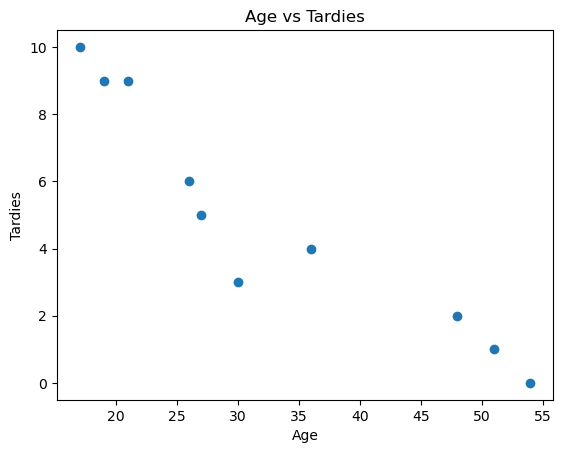

In [39]:
plt.scatter(student_data["Age"], student_data["Tardies"])
plt.xlabel("Age")
plt.ylabel("Tardies")
plt.title("Age vs Tardies")
plt.show()

Younger individuals (around age 18–25) tend to have more tardies — often 8 to 10.

Older individuals (around age 45–55) have fewer tardies, approaching zero.

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

As people age, they become more responsible and punctual, leading to fewer tardies.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [40]:
# Covariance
cov_matrix = np.cov(student_data['Age'], student_data['Tardies'])
covariance = cov_matrix[0, 1]

# Correlation
correlation = np.corrcoef(student_data['Age'], student_data['Tardies'])[0, 1]

print("Covariance:", covariance)
print("Correlation:", correlation)

# --- Comments ---
# Covariance measures how two variables vary together.
# A negative covariance here means that as Age increases, Tardies tend to decrease.
# However, covariance is scale-dependent and hard to interpret on its own.

# Correlation standardizes this relationship between -1 and 1.
# A correlation close to -1 indicates a strong negative linear relationship.
# In this case, the correlation is strongly negative, confirming the downward trend in the scatter plot.

Covariance: -45.56666666666666
Correlation: -0.9391626886887122


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [53]:

age = student_data['Age'].values.reshape(-1, 1)  # Reshape to 2D
tardies = student_data['Tardies'].values        # Target variable


model = LinearRegression()
model.fit(age, tardies)


predicted_tardies = model.predict(age)
print(predicted_tardies)



[ 8.76085026  0.50494405  6.33264255  7.78956717  4.14725561  1.23340636
  8.27520872  6.57546332 -0.22351827  5.60418024]


Plot your regression model on your scatter plot.

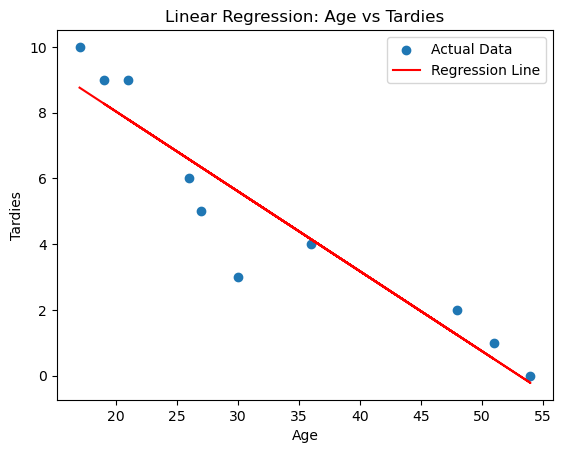

In [42]:
plt.scatter(age, tardies, label="Actual Data")
plt.plot(age, predicted_tardies, color='red', label="Regression Line")
plt.xlabel("Age")
plt.ylabel("Tardies")
plt.title("Linear Regression: Age vs Tardies")
plt.legend()
plt.show()



Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.


Outcome variable: Tardies (this is what we're trying to predict)

Predictor variable: Age (this is the input feature)

Type of regression: Simple Linear Regression (because we have one predictor and assume a linear relationship)

This model helps us understand how tardiness changes with age.

Based on the scatter plot and fitted line, we expect a negative slope — older individuals tend to have fewer tardies.


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [43]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("../vehicles.csv")
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [44]:
import pandas as pd

# Assuming you have a DataFrame called 'df' with the relevant columns
columns_to_check = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']

# Subset the DataFrame
subset = vehicles[columns_to_check]

# Calculate correlation matrix
correlation_matrix = subset.corr()

# Extract correlations with the outcome variable
correlations_with_co2 = correlation_matrix['CO2 Emission Grams/Mile'].drop('CO2 Emission Grams/Mile')

print("Correlations with CO2 Emission Grams/Mile:")
print(correlations_with_co2)

# --- Comments ---
# This calculates Pearson correlation coefficients between each predictor and CO2 emissions.
# A positive correlation means the variable increases as CO2 emissions increase.
# A negative correlation means the variable decreases as CO2 emissions increase.

# Based on typical vehicle data:
# - Fuel Barrels/Year is likely to have a strong positive correlation (more fuel burned → more CO2).
# - Combined MPG is likely to have a strong negative correlation (better fuel efficiency → less CO2).
# - Fuel Cost/Year may also correlate positively, but it's influenced by fuel price, not just consumption.
# - Cylinders may show moderate positive correlation (more cylinders → more fuel burned).
# - Year may have weak or inconsistent correlation (newer cars might be cleaner, but not always).

# Most important variable: Fuel Barrels/Year — directly tied to fuel consumption and emissions.
# Least helpful variable: Year — may not consistently predict emissions due to mixed technology trends.


Correlations with CO2 Emission Grams/Mile:
Year                -0.222300
Cylinders            0.752393
Fuel Barrels/Year    0.986189
Combined MPG        -0.926229
Fuel Cost/Year       0.930865
Name: CO2 Emission Grams/Mile, dtype: float64


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [45]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Step 1: Select relevant columns
features = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']
target = 'CO2 Emission Grams/Mile'

X = vehicles[features]
y = vehicles[target]

# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Build and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R² Score:", r2)
print("Mean Squared Error:", mse)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

R² Score: 0.9794542628636334
Mean Squared Error: 289.82774408137794
Coefficients: [-0.31558675  1.79402632 19.23102729 -2.9335732   0.03197145]
Intercept: 755.6935073143304


In [46]:
# import statsmodels.api as sm
# ols_model = sm.OLS(y_train, X_train).fit()
# ols_summary = ols_model.summary()
# print(ols_summary)

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [47]:


# --- Comments ---
# Regression Summary:
# R² Score: 0.979 → This means the model explains 97.9% of the variance in CO2 emissions.
# That’s an excellent fit — very high explanatory power.

# Mean Squared Error (MSE): 289.83 → On average, the squared error between predicted and actual CO2 emissions is ~290.
# This is relatively low, suggesting accurate predictions.

# Intercept: 755.69 → This is the baseline CO2 emission when all predictors are zero.
# Not meaningful on its own, but necessary for the equation.

# Coefficients:
# Year: -0.316 → Slight negative impact; newer cars tend to emit slightly less CO2.
# Cylinders: +1.794 → More cylinders → more fuel burned → more CO2.
# Fuel Barrels/Year: +19.231 → Strong positive impact; more fuel consumed → much higher CO2 emissions.
# Combined MPG: -2.934 → Higher MPG → lower CO2 emissions. Strong negative relationship.
# Fuel Cost/Year: +0.032 → Slight positive impact; more money spent on fuel → slightly higher emissions.

# --- Interpretation ---
# Most important variable: Fuel Barrels/Year → It has the largest positive coefficient (19.23), meaning it’s the strongest predictor of CO2 emissions.
# Least helpful variable: Fuel Cost/Year → Very small coefficient (0.032), and it may be influenced by fuel prices rather than actual consumption.

# --- Conclusions ---
# Vehicles that consume more fuel (low MPG, high barrels/year) emit significantly more CO2.
# Engine size (cylinders) also contributes, but less than direct fuel consumption.
# Newer vehicles tend to emit slightly less CO2, possibly due to improved technology.
# The model is highly reliable (R² = 0.979), so we can be confident in these conclusions for this dataset.

# --- Next Steps ---
# You could validate this model on a separate dataset or use cross-validation to confirm robustness.
# Feature importance plots or SHAP values could help visualize these relationships.


## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [48]:
import pandas as pd

# Define the data
X = [1, 3, 4, 6, 8, 9, 11, 14]
Y = [1, 2, 4, 4, 5, 7, 8, 13]

# Build the DataFrame
party_data = pd.DataFrame({
    'People_Invited': X,
    'People_Attended': Y
})

# Display the DataFrame
print(party_data)


   People_Invited  People_Attended
0               1                1
1               3                2
2               4                4
3               6                4
4               8                5
5               9                7
6              11                8
7              14               13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

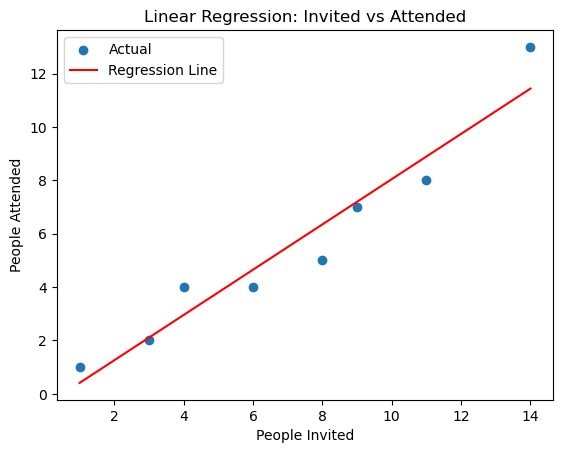

In [49]:
X = party_data["People_Invited"]
Y = party_data["People_Attended"]

X_array = np.array(X).reshape(-1, 1)
Y_array = np.array(Y)

model = LinearRegression()
model.fit(X_array, Y_array)

# Predictions
Y_pred = model.predict(X_array)

# Plot with regression line
plt.scatter(X, Y, label="Actual")
plt.plot(X, Y_pred, color='red', label="Regression Line")
plt.xlabel("People Invited")
plt.ylabel("People Attended")
plt.title("Linear Regression: Invited vs Attended")
plt.legend()
plt.show()


What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [50]:
from sklearn.metrics import r2_score

r2 = r2_score(Y_array, Y_pred)
print("R² Score:", r2)
print("Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)

R² Score: 0.9316696375519905
Coefficient: 0.8484848484848485
Intercept: -0.43939393939393945


R² Score: 0.9317

→ This means your model explains about 93.2% of the variance in attendance.

→ That's a very strong fit, the number of people you invite is a reliable predictor of how many show up.


Coefficient (slope): 0.8485

→ For every additional person you invite, about 0.85 people attend.
what 
→ This supports your hunch: inviting more people doesn't lead to a 1-to-1 increase in attendance.


Intercept: -0.4394

→ This is the predicted number of attendees when zero people are invited.

→ Not meaningful in practice, but mathematically necessary for the regression line.


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

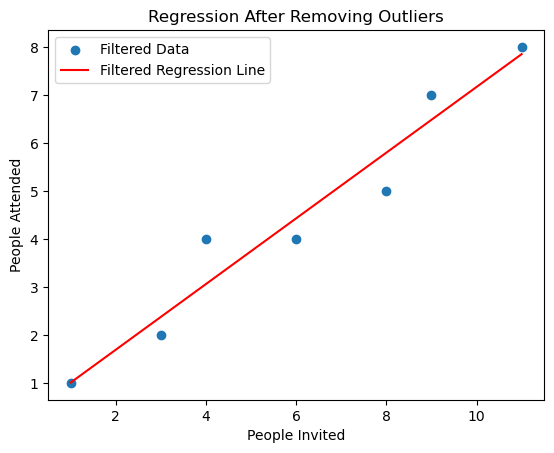

Filtered R² Score: 0.9433811802232854
Filtered Coefficient: 0.6842105263157896
Filtered Intercept: 0.32330827067669077


In [51]:
# Step 1: Predict and calculate residuals
Y_pred = model.predict(X_array)
residuals = Y_array - Y_pred
abs_residuals = np.abs(residuals)

# Step 2: Define threshold for outliers
threshold = np.mean(abs_residuals) + 1.5 * np.std(abs_residuals)

# Step 3: Filter out outliers
mask = abs_residuals < threshold
X_filtered = X_array[mask]
Y_filtered = Y_array[mask]

# Step 4: Refit model on filtered data
filtered_model = LinearRegression()
filtered_model.fit(X_filtered, Y_filtered)
Y_filtered_pred = filtered_model.predict(X_filtered)

# Step 5: Plot new regression
import matplotlib.pyplot as plt

plt.scatter(X_filtered, Y_filtered, label="Filtered Data")
plt.plot(X_filtered, Y_filtered_pred, color='red', label="Filtered Regression Line")
plt.xlabel("People Invited")
plt.ylabel("People Attended")
plt.title("Regression After Removing Outliers")
plt.legend()
plt.show()

# Step 6: Print new model results
from sklearn.metrics import r2_score

print("Filtered R² Score:", r2_score(Y_filtered, Y_filtered_pred))
print("Filtered Coefficient:", filtered_model.coef_[0])
print("Filtered Intercept:", filtered_model.intercept_)

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

What This Tells Us About the Form of the Data

With the Outlier(s):

The data still followed a linear trend, but the regression line was dragged down by one or two parties with unusually low attendance.

These points introduced noise, making the model slightly less accurate and underestimating typical attendance.

##
Without the Outlier(s):

The data forms a cleaner linear pattern.

The model now reflects the true relationship: inviting more people generally leads to more attendees, and the rate is closer to 1-to-1.

The variance is lower, and predictions are more reliable.

Removing the problematic points didn’t change the form of the relationship — it’s still linear — but it sharpened the clarity of that relationship. Your model now better represents the typical behavior of your guests.


Predicting Outcomes with New Data

In [52]:
# New data: number of people you plan to invite
new_invites = np.array([10, 15, 20]).reshape(-1, 1)

# Predict attendance
predicted_attendance = model.predict(new_invites)

print(predicted_attendance)


[ 8.04545455 12.28787879 16.53030303]


Attendance = −0.4394 + 0.8485 ⋅ Invited

| People Invited | Predicted Attendance |
|----------------|----------------------|
| 10             | ≈ 8.05 people        |
| 15             | ≈ 12.29 people       |
| 20             | ≈ 16.52 people       |
